# Transformação de imagens

> Atenção: este notebook foi desenhado para funcionar no **Google Collab**. Se pretende executar localmente prefira a versão local deste notebook, sem o sufixo ```-collab```.

## 1. Requerimentos

Utilize o comando ao lado para instalar pelo Anaconda terminal.

* OpenCV 3.4.3 (```conda install -c conda-forge opencv==3.4.3```)
* Matplotlib 3.1.3 (```conda install matplotlib==3.1.3```)
* Seaborn 0.0.10 (```conda install -c conda-forge seaborn==0.10.0```)
* Numpy 1.18.1 (```conda install numpy==1.15.2```)

### 1.2 Arquivos

Baixe o repositório do GitHub utilizando o comando abaixo. Em caso de atualização, utilize o comando para apagar o diretório antes.

In [ ]:
!rm -rf fiap-ml-visao-computacional/

In [ ]:
!git clone https://github.com/michelpf/fiap-ml-visao-computacional

Vamos agora posicionar o diretório do repositório para a aula respectiva. Nesse caso envie o comando de mudança de diretório.

In [ ]:
%cd fiap-ml-visao-computacional/aula-2-transformacao/

Importação das bibliotecas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

#Exibição na mesma tela do Jupyter
%matplotlib inline

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

## 2. Rotação

Carregando uma imagem previamente existente

Text(0.5, 1.0, 'Documento')

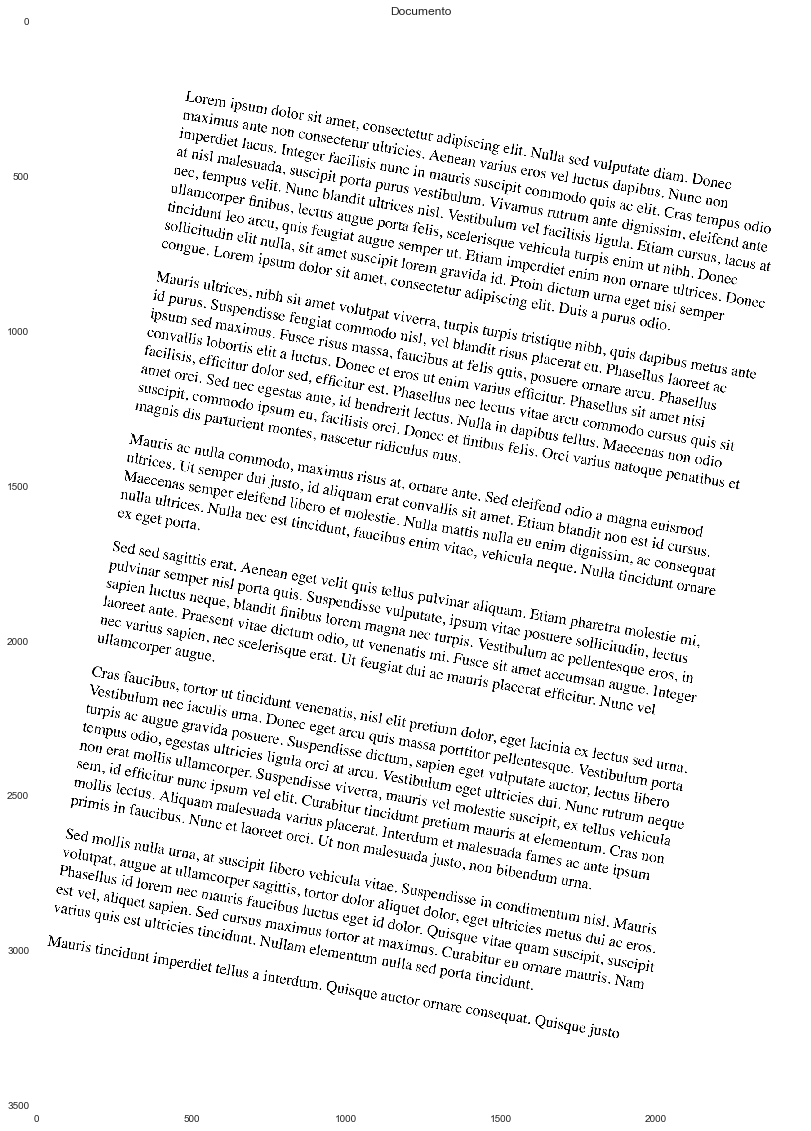

In [62]:
imagem = cv2.imread("imagens/documento.png")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,20))
plt.imshow(imagem)
plt.title("Documento")

Aplicando matriz de rotação e incluindo na transformação afim.

In [76]:
height, width = imagem.shape[:2]
matriz_rotacao = cv2.getRotationMatrix2D((50, 3000), 10, 1)
print(matriz_rotacao)

[[ 9.84807753e-01  1.73648178e-01 -5.20184921e+02]
 [-1.73648178e-01  9.84807753e-01  5.42591498e+01]]


Text(0.5, 1.0, 'Robô Rotacionado')

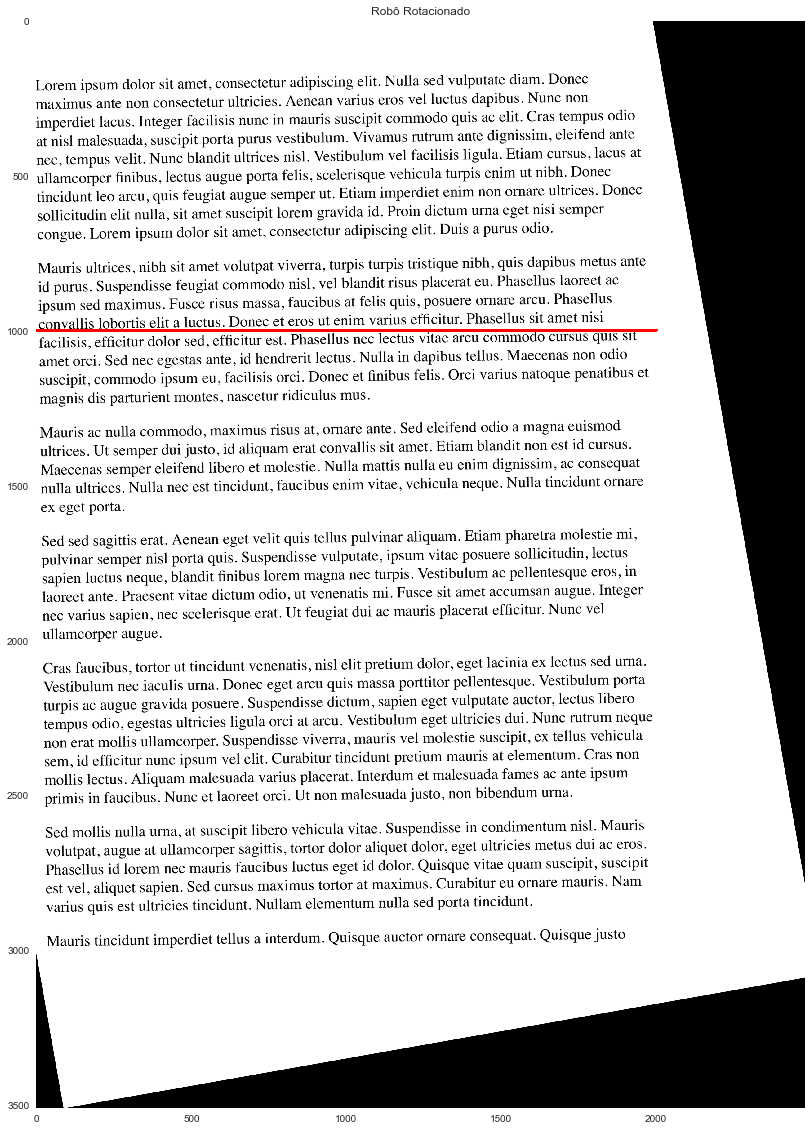

In [77]:
imagem_rotacionada = cv2.warpAffine(imagem, matriz_rotacao, (width, height))

cv2.line(imagem_rotacionada,(0,1000), (2000,1000), (255, 0, 0), 10)

plt.figure(figsize=(30,20))
plt.imshow(imagem_rotacionada)
plt.title("Robô Rotacionado")

Text(0.5, 1.0, 'Robô Rotacionado')

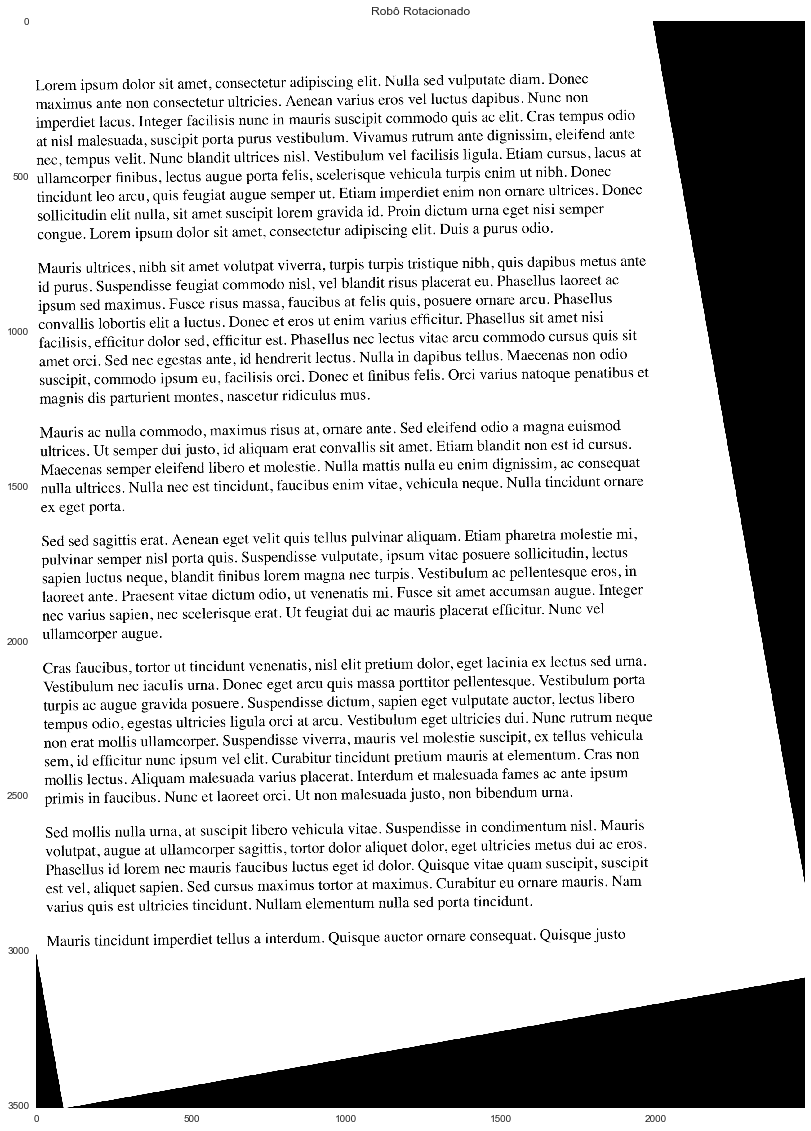

In [78]:
imagem_rotacionada = cv2.warpAffine(imagem, matriz_rotacao, (width, height))

plt.figure(figsize=(30,20))
plt.imshow(imagem_rotacionada)
plt.title("Robô Rotacionado")

Text(0.5, 1.0, 'Robô Rotacionado')

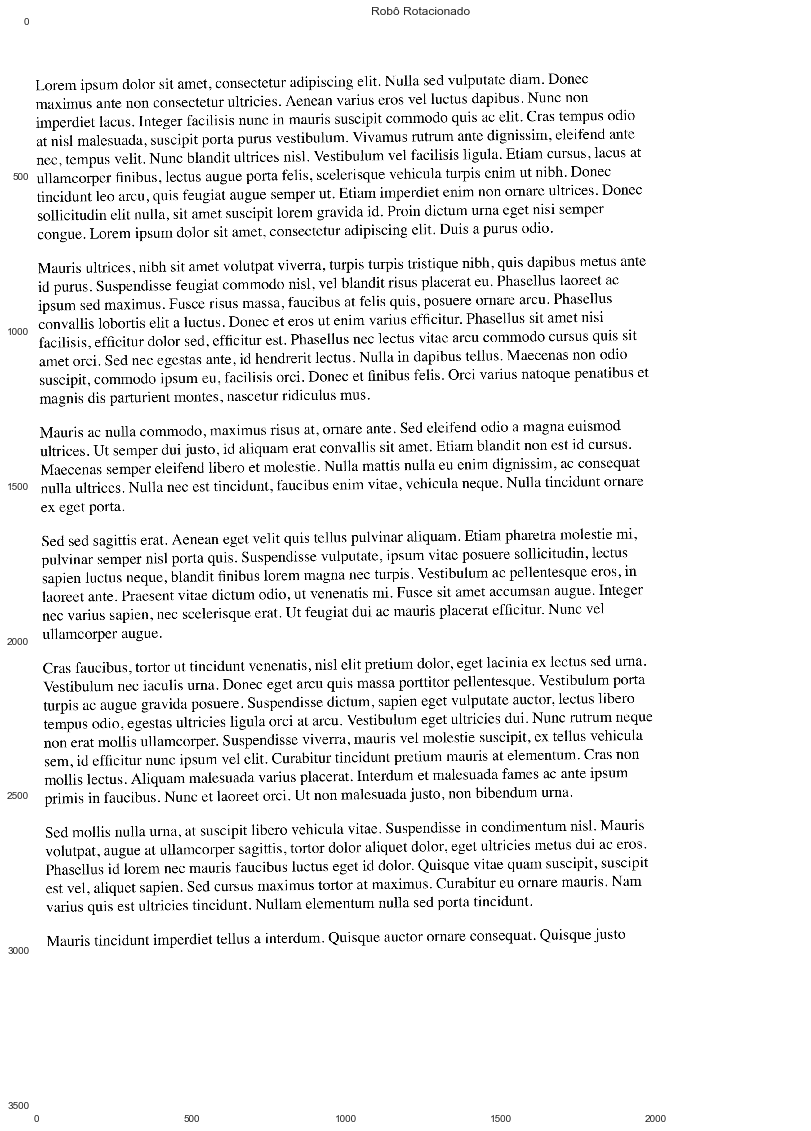

In [41]:
imagem_rotacionada = cv2.warpAffine(imagem, matriz_rotacao, (width, height), borderValue=(255,255,255))

plt.figure(figsize=(30,20))
plt.imshow(imagem_rotacionada)
plt.title("Robô Rotacionado")

## 2. Translação

Carregando uma imagem previamente existente

Text(0.5, 1.0, 'Documento Rotacionado')

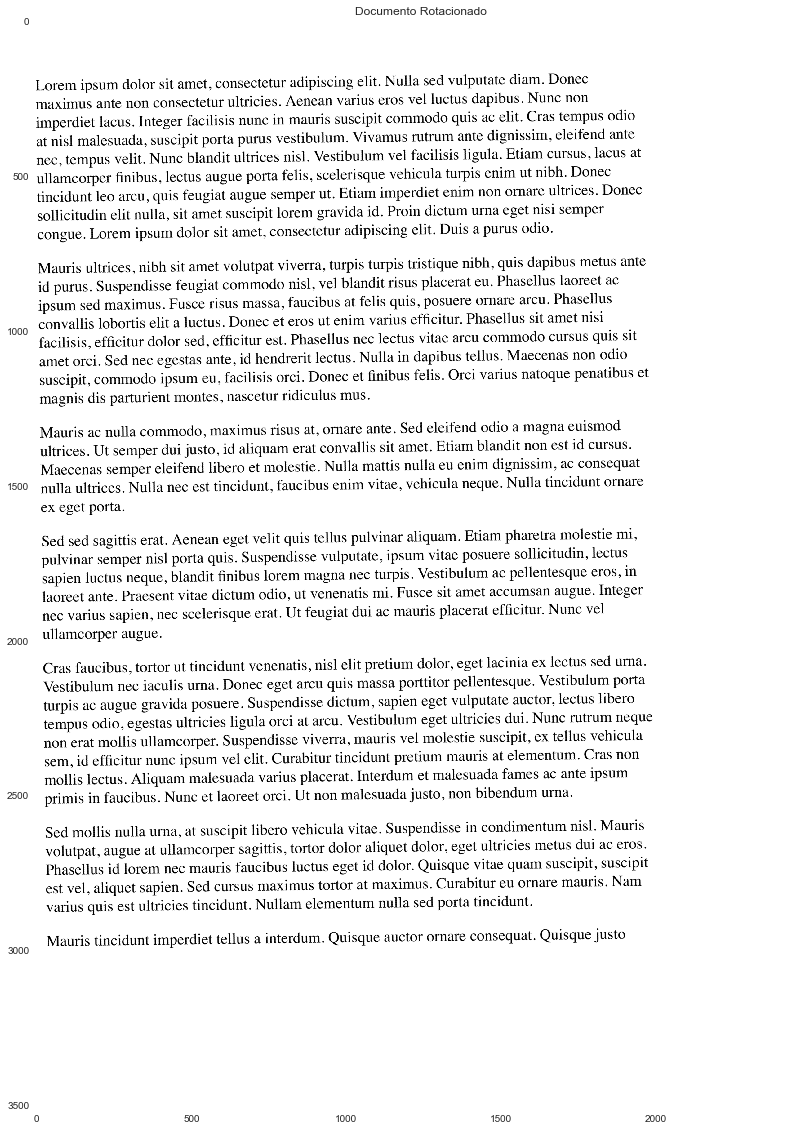

In [42]:
plt.figure(figsize=(30,20))
plt.imshow(imagem_rotacionada)
plt.title("Documento Rotacionado")

Aplicando translação, sempre em paralelo nos eixos x e y. Neste caso utilizando valores positivos.

In [43]:
height, width = imagem.shape[:2]

#Vamos alterar o tamanho para a 25% do original
height_alterado, width_alterado = height/4, width/4

# Matriz de translação
matriz_translacao = np.float32([[1, 0, 200],[0, 1, 0]])

print(matriz_translacao)

[[  1.   0. 200.]
 [  0.   1.   0.]]


Text(0.5, 1.0, 'Documento Translação')

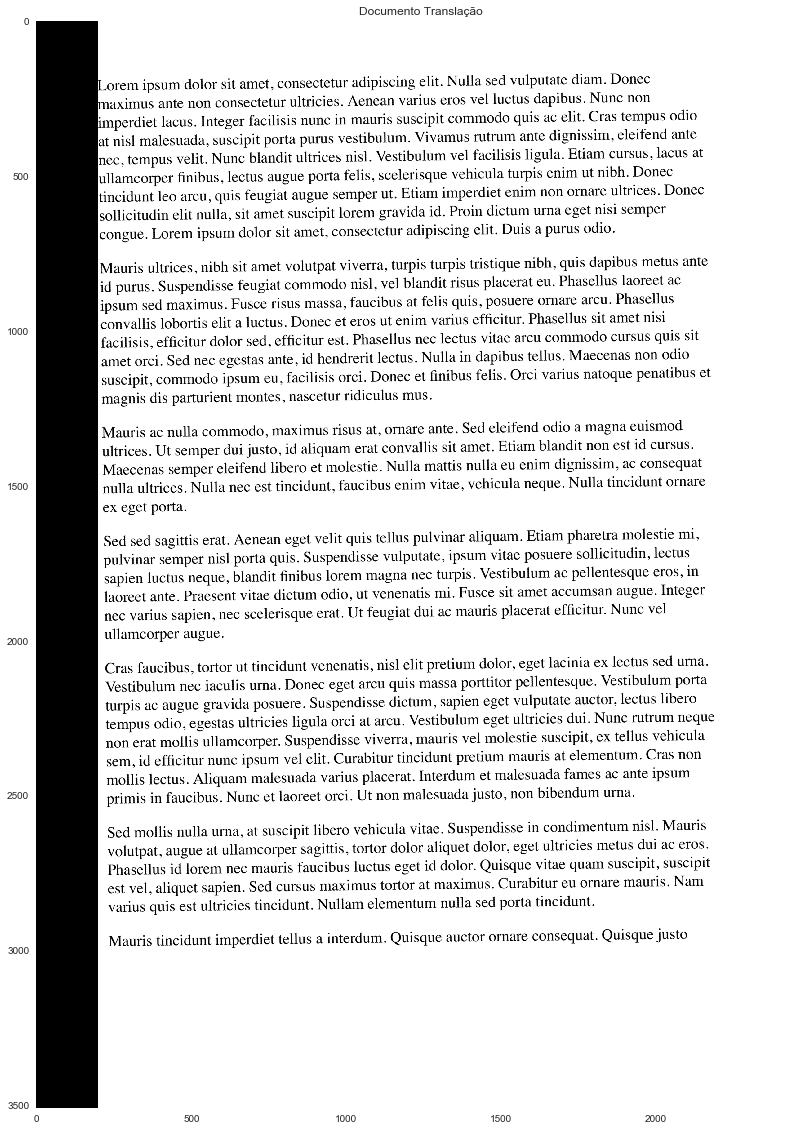

In [44]:
imagem_transladada = cv2.warpAffine(imagem_rotacionada, matriz_translacao, (width, height))

plt.figure(figsize=(30,20))
plt.imshow(imagem_transladada)
plt.title("Documento Translação")

Text(0.5, 1.0, 'Documento Translação')

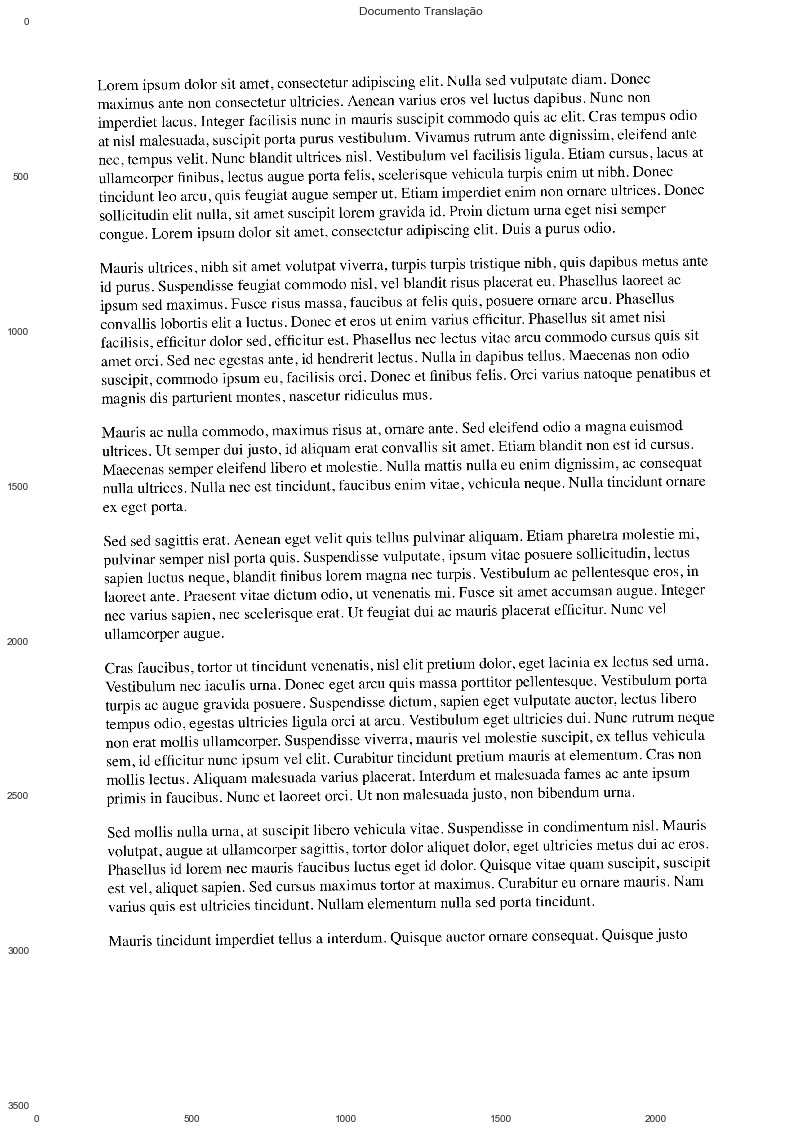

In [45]:
imagem_transladada = cv2.warpAffine(imagem_rotacionada, matriz_translacao, (width, height), borderValue=(255,255,255))

plt.figure(figsize=(30,20))
plt.imshow(imagem_transladada)
plt.title("Documento Translação")

Aplicando translação no sentido inverso, utilizando valores negativos.

In [52]:
matriz_translacao = np.float32([[1, 0, -300],[0, 1, -100]])

# Matriz de translação
print(matriz_translacao)

[[   1.    0. -300.]
 [   0.    1. -100.]]


Text(0.5, 1.0, 'Documento Translação')

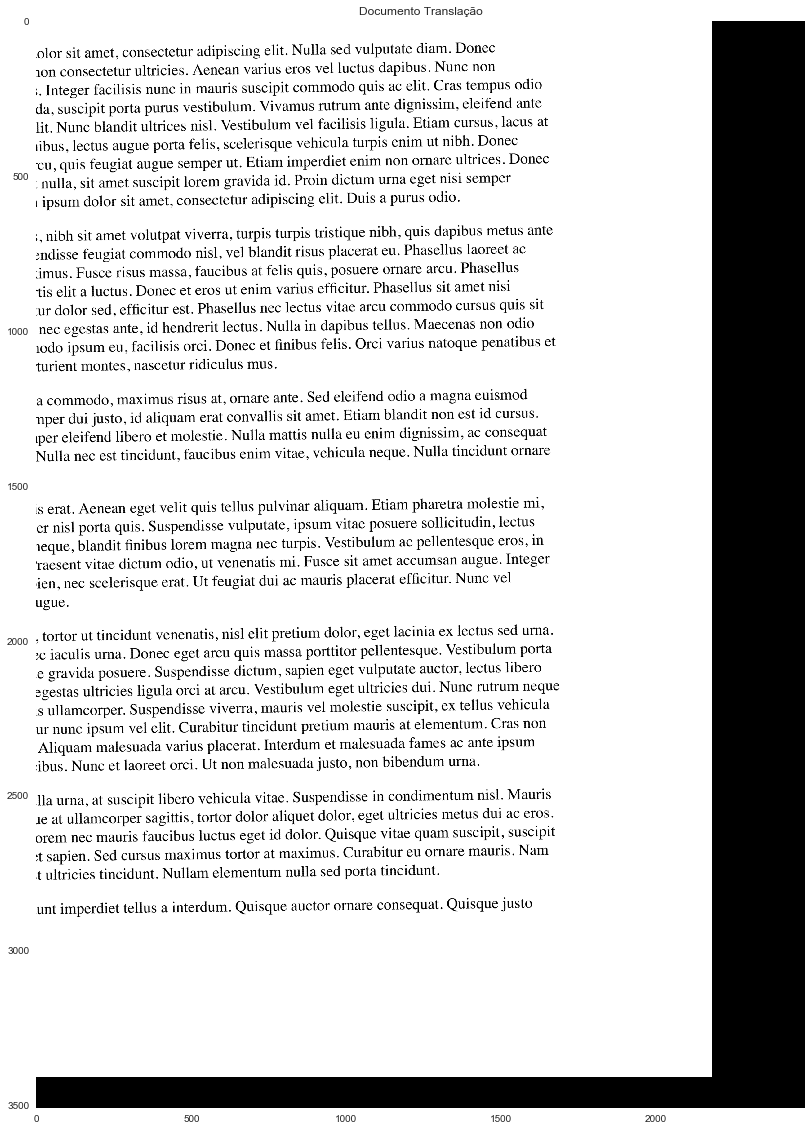

In [54]:
imagem_transladada = cv2.warpAffine(imagem_rotacionada, matriz_translacao, (width, height))

plt.figure(figsize=(30,20))
plt.imshow(imagem_transladada)
plt.title("Documento Translação")

## 4. Redimensionamento e Interpolação

O redimensionamento de imagens pode utilizar uma série de interpolações que servem para cobrir os pixels que são expandidos. Cada tipo de interpolação traz aspectos de maior nitidez e velocidade de processamento.

*Os experimentos abaixo foram adaptados deste [link](http://tanbakuchi.com/posts/comparison-of-openv-interpolation-algorithms), de Anthony Tanbakuchi.*

Carregando uma imagem previamente existente

In [ ]:
imagem = cv2.imread("imagens/coffee_small.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.imshow(imagem)
plt.title("Café Original (Pequeno)")

Escala por fator (multiplicação)

In [ ]:
fator_x=5
fator_y=5

imagem_nova_linear = cv2.resize(imagem, None, fx=fator_x, fy=fator_y)
imagem_nova_cubica = cv2.resize(imagem, None, fx=fator_x, fy=fator_y, interpolation=cv2.INTER_CUBIC)
imagem_nova_area = cv2.resize(imagem, None, fx=fator_x, fy=fator_y, interpolation=cv2.INTER_AREA)
imagem_nova_lanczo = cv2.resize(imagem, None, fx=fator_x, fy=fator_y, interpolation=cv2.INTER_LANCZOS4)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(imagem_nova_linear)
plt.title("Ampliação Linear")

plt.subplot(2,2,2)
plt.imshow(imagem_nova_cubica)
plt.title("Ampliação Cúbica")

plt.subplot(2,2,3)
plt.imshow(imagem_nova_area)
plt.title("Ampliação Interárea")

plt.subplot(2,2,4)
plt.imshow(imagem_nova_lanczo)
plt.title("Ampliação Lanczo")

Escala por novo tamanho.

In [ ]:
novo_tamanho = (200,200)

imagem_nova_linear = cv2.resize(imagem, novo_tamanho)
imagem_nova_cubica = cv2.resize(imagem, novo_tamanho, interpolation=cv2.INTER_CUBIC)
imagem_nova_interarea = cv2.resize(imagem, novo_tamanho, interpolation=cv2.INTER_AREA)
imagem_nova_lanczo = cv2.resize(imagem, novo_tamanho, interpolation=cv2.INTER_LANCZOS4)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(imagem_nova_linear)
plt.title("Ampliação Linear")

plt.subplot(2,2,2)
plt.imshow(imagem_nova_cubica)
plt.title("Ampliação Cúbica")

plt.subplot(2,2,3)
plt.imshow(imagem_nova_interarea)
plt.title("Ampliação Interárea")

plt.subplot(2,2,4)
plt.imshow(imagem_nova_lanczo)
plt.title("Ampliação Lanczo")

## 5. Transformação Homográfica (Não-Afim)

Text(0.5, 1.0, 'Cheque')

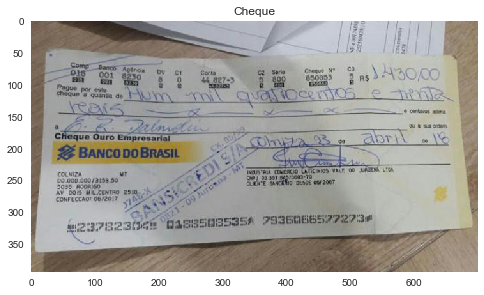

In [79]:
imagem = cv2.imread("imagens/cheque.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.imshow(imagem)
plt.title("Cheque")

Pontos no sentido horário, começando pelo superior a esquerda.

Text(0.5, 1.0, 'Cheque com Marcadores')

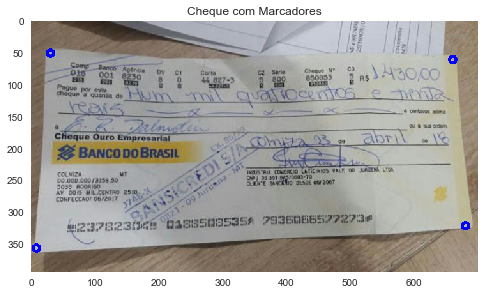

In [121]:
imagem_marcadores = imagem.copy()

p1 = (30,50)
p2 = (660, 60)
p3 = (8, 355)
p4 = (680, 320)

tamanho_final = (700, 300)

pontos_marcadores = np.float32([p1,p2,p3,p4])
pontos_destino = np.float32([(0,0),(tamanho_final[0],0),(0,tamanho_final[1]),tamanho_final])

# Adicionando marcadores para visualizar os pontos que serão expandidos

cv2.circle(imagem_marcadores, p1, 5, (0, 0, 255), 3)
cv2.circle(imagem_marcadores, p2, 5, (0, 0, 255), 3)
cv2.circle(imagem_marcadores, p3, 5, (0, 0, 255), 3)
cv2.circle(imagem_marcadores, p4, 5, (0, 0, 255), 3)

plt.imshow(imagem_marcadores)
plt.title("Cheque com Marcadores")

Text(0.5, 1.0, 'Portal com Marcadores')

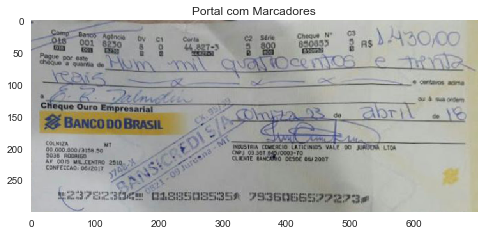

In [122]:
# Realizando a transformação não afim

matriz_perspectiva = cv2.getPerspectiveTransform(pontos_marcadores, pontos_destino)
imagem_transformada = cv2.warpPerspective(imagem, matriz_perspectiva, tamanho_final)

plt.imshow(imagem_transformada)
plt.title("Portal com Marcadores")

## 6. Recorte de imagens e região de interesse (ROI)

No OpenCV não existe uma função própria para recortar segmentos de uma imagem. Por outro lado, conseguimos fazer esta tarefa fácilmente aplicando diretamente na matriz da imagem as alterações.

Text(0.5, 1.0, 'Imagem Original')

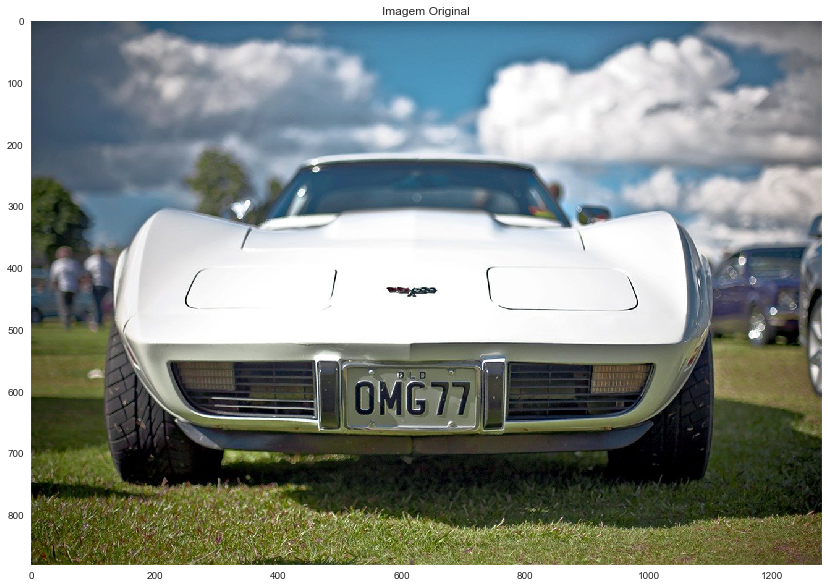

In [145]:
imagem = cv2.imread("imagens/car.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(imagem)
plt.title("Imagem Original")

Text(0.5, 1.0, 'Imagem Recortada')

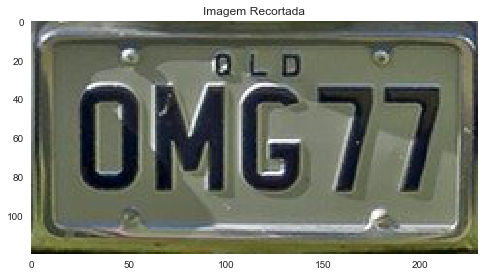

In [139]:
linha_y_inicio, coluna_x_inicio = 550, 500
linha_y_final, coluna_x_final =  670, 730

imagem_recortada = imagem[linha_y_inicio:linha_y_final, coluna_x_inicio:coluna_x_final]

plt.imshow(imagem_recortada)
plt.title("Imagem Recortada")

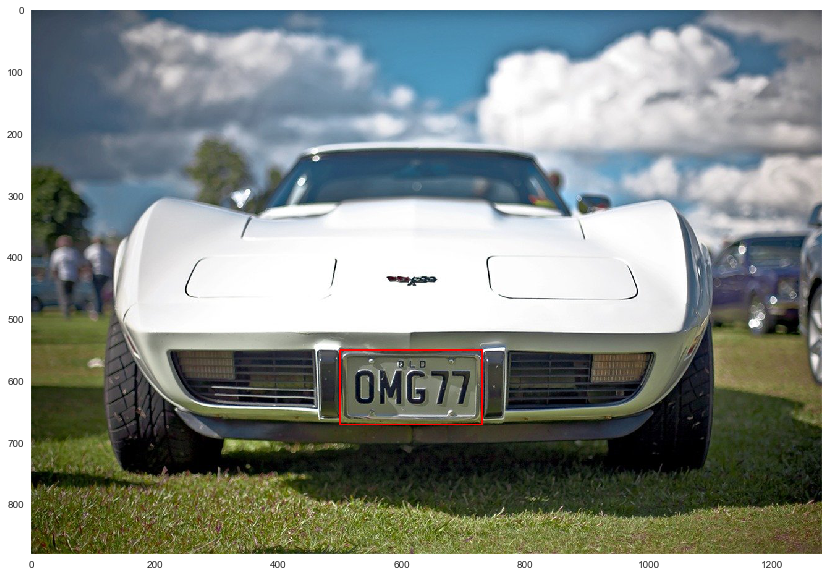

In [140]:
imagem_anotada = imagem.copy()
cv2.rectangle(imagem_anotada,(coluna_x_inicio,linha_y_inicio), (coluna_x_final,linha_y_final), (255, 0, 0), 2)

plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)

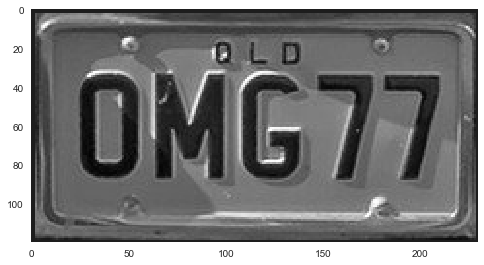

In [146]:
roi = imagem_anotada[linha_y_inicio:linha_y_final, coluna_x_inicio:coluna_x_final]

plt.imshow(roi)

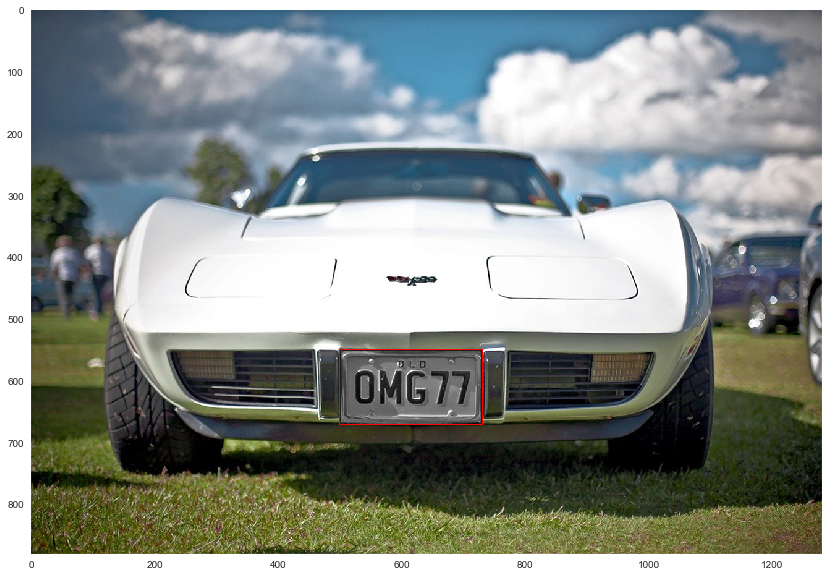

In [142]:
roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
roi = cv2.cvtColor(roi, cv2.COLOR_GRAY2BGR)

imagem_anotada[linha_y_inicio:linha_y_final, coluna_x_inicio:coluna_x_final] = roi

plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)

Text(0.5, 1.0, 'Imagem Original')

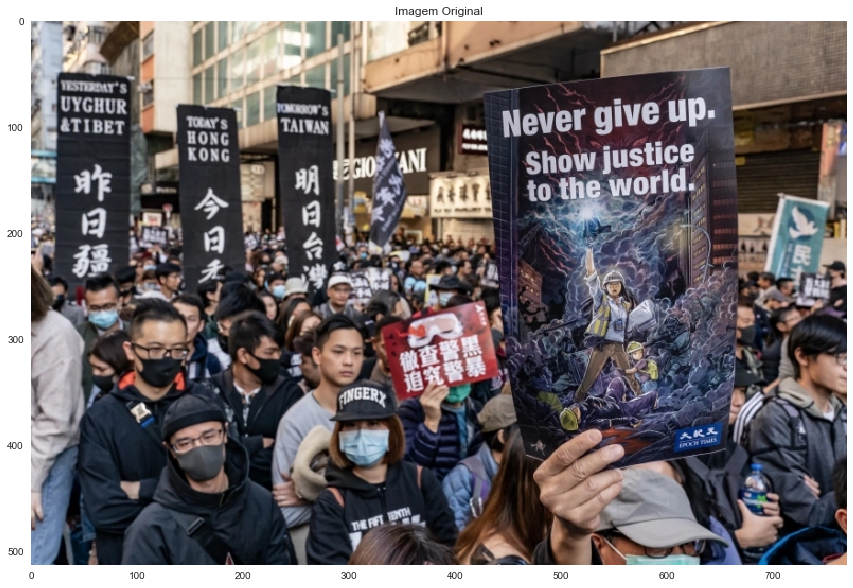

In [147]:
imagem = cv2.imread("imagens/protesters.png")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(imagem)
plt.title("Imagem Original")

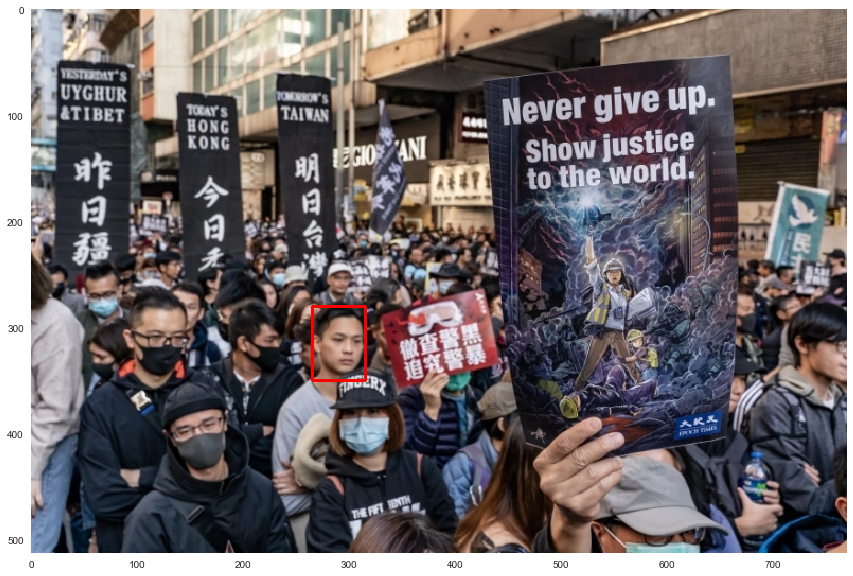

In [157]:
linha_y_inicio, coluna_x_inicio = 280, 265
linha_y_final, coluna_x_final =  350, 315

imagem_anotada = imagem.copy()
cv2.rectangle(imagem_anotada,(coluna_x_inicio,linha_y_inicio), (coluna_x_final,linha_y_final), (255, 0, 0), 2)

plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)

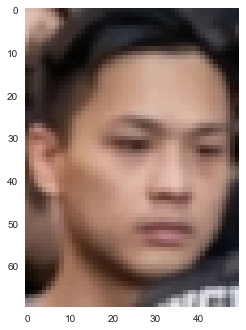

In [159]:
roi = imagem[linha_y_inicio:linha_y_final, coluna_x_inicio:coluna_x_final]

plt.imshow(roi)

## 7. Alterando brilho (nitidez) de uma imagem

Refere-se a tornar a imagem mais clara.

Text(0.5, 1.0, 'Imagem Original')

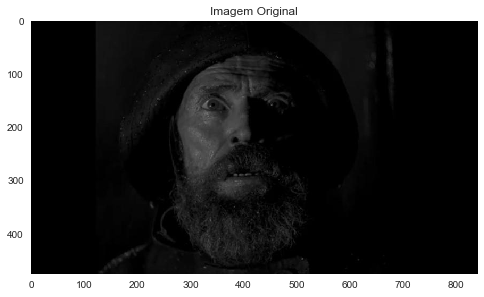

In [160]:
imagem = cv2.imread("imagens/lighthouse.jpeg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

imagem_shape = imagem.shape

plt.imshow(imagem)
plt.title("Imagem Original")

Text(0.5, 1.0, 'Imagem Brilho')

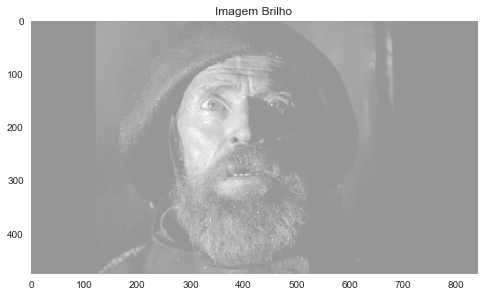

In [163]:
matriz_brilho = np.ones(imagem_shape, np.uint8) * 150
imagem_brilho = cv2.add(imagem, matriz_brilho)

plt.imshow(imagem_brilho)
plt.title("Imagem Brilho")

Text(0.5, 1.0, 'Imagem Escura')

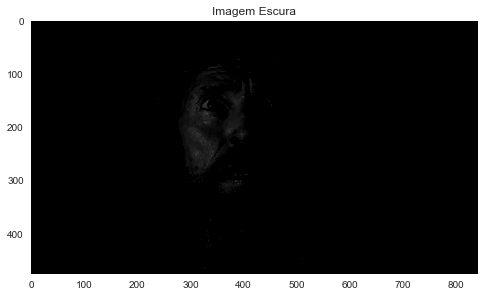

In [165]:
matriz_brilho = np.ones(imagem_shape, np.uint8) * 50
imagem_escura = cv2.subtract(imagem, matriz_brilho)

plt.imshow(imagem_escura)
plt.title("Imagem Escura")

## 8. Operações lógicas

As operações lógicas ou bitwise operations são operações do tipo and, or, xor e not. São utilizadas na composição de 2 imagens, criar máscaras e intersecções.

In [ ]:
retangulo = np.zeros((300,300), np.uint8)
cv2.rectangle(retangulo, (50,50), (200,200), 255, -2)

plt.imshow(retangulo, cmap="gray")
plt.title("Retangulo")

In [ ]:
circulo = np.zeros((300,300), np.uint8)
cv2.circle(circulo,(180,150), 100, 255, -2)

plt.imshow(circulo, cmap="gray")
plt.title("Círculo")

In [ ]:
operacao_and = cv2.bitwise_and(retangulo, circulo)

plt.imshow(operacao_and, cmap="gray")
plt.title("Operação And (E)")

In [ ]:
operacao_or = cv2.bitwise_or(retangulo, circulo)

plt.imshow(operacao_or, cmap="gray")
plt.title("Operação Or (Ou)")

In [ ]:
operacao_xor = cv2.bitwise_xor(retangulo, circulo)

plt.imshow(operacao_or, cmap="gray")
plt.title("Operação Xor (Ou Exclusivo)")

In [ ]:
operacao_negacao = cv2.bitwise_not(circulo)

plt.imshow(operacao_negacao, cmap="gray")
plt.title("Operação Not (Negação)")